## Identificar quem são os conectores-chave

In [2]:
!source ~/.virtualenvs/books/bin/activate

In [3]:
# Dados
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

In [4]:
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

In [5]:
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [6]:
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [7]:
for user in users:
    user["friends"] = []


In [8]:
for i, j in friendships:
    # isso funciona porque user[i] é o usuário cuja id é i.
    users[i]["friends"].append(users[j]) # adiciona i como uma amigo de j
    users[j]["friends"].append(users[i]) # adiciona i como uma amigo de j

In [9]:
def number_of_friends(user):
    # quantos amigos o usuário tem?
    return len(user["friends"])

In [10]:
total_connections = sum(number_of_friends(user) for user in users)

In [11]:
from __future__ import division

In [12]:
num_users = len(users)
avg_connections = total_connections / num_users
print(avg_connections)

2.4


In [13]:
#cria uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

In [14]:
sorted(num_friends_by_id,
        key=lambda num_friends: num_friends,
        reverse=True)

[(9, 1),
 (8, 3),
 (7, 2),
 (6, 2),
 (5, 3),
 (4, 2),
 (3, 3),
 (2, 3),
 (1, 3),
 (0, 2)]

#### Estimular mais conexões entre os seus membros, desenvolver sugestões de "Cientistas de dados que você talvez conheça".

In [15]:
def friends_of_friend_ids_bad(user):
    # "foaf" é abreviação de "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"]   # para cada amigo de usuário
            for foaf in friend["friends"]]  # para cada _their_friends


In [16]:
friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [17]:
print("user[0]", [friend["id"] for friend in  users[0]["friends"]])
print("user[1]", [friend["id"] for friend in  users[1]["friends"]])
print("user[2]", [friend["id"] for friend in  users[2]["friends"]])

user[0] [1, 2]
user[1] [0, 2, 3]
user[2] [0, 1, 3]


In [18]:
from collections import Counter                   # not loaded by default

In [19]:
def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # para cada um dos meus amigos
        for foaf_id in friendships[friend_id]     # encotre seus amigos
        if foaf_id != user_id                     # que não seja eu
        and foaf_id not in friendships[user_id]   # e que não sejam meus amigos
    )


print(friends_of_friends(users[3]))

Counter({0: 1, 2: 1})


In [20]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [21]:
# construir uma função que encontre usuários com o mesmo interesse
def data_scientist_who_like(target_interest):
    return[user_id
           for user_id, user_interest in interests
           if user_interest == user_interest
           ]

In [22]:
# se tiver muitos usuários e interesses é melhor construir um índice de3 interesses para usuários

from collections import defaultdict

# as chaves são interesses, os valores são listas de user_ids com interesses para cada usuário
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    [interest].append(user_id)

In [23]:
# as chaves são user_ids, os valores são as listas de interesses para aquele user_id

interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [24]:
"""
Criar uma função que:
    Itera sobre os interesses do usuário
    Para cada interesse, itera os outros usuários com aquele interesse
    Mantém a contagem de quantas vezes vemos cada outro usuário
"""

def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

In [25]:
"""
O resultado é a lista de usuários e quais interesses em comum, sendo que,
9: 3 ==> significa que o usuário id 9 tem o mesmo interesse na ferramenta id 3 com relação ao usuário 0
no caso 'Java'
1: 2 ==> significa que o usuário is 1 tem o mesmo interesse na ferramenta id 1 (lista pessoal do usuário 0)
no caso 'HBase'
"""

most_common_interests_with(users[0])

Counter()

### O trecho acima continuará no capitulo 22 da versão 1 do livre e 23 da versão 2

## Relação Salários e Experiência

In [26]:
# valor do salário e tempo de experiência em anos

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [27]:
salaries_and_tenures

[(83000, 8.7),
 (88000, 8.1),
 (48000, 0.7),
 (76000, 6),
 (69000, 6.5),
 (76000, 7.5),
 (60000, 2.5),
 (83000, 10),
 (48000, 1.9),
 (63000, 4.2)]

#### Analisar a média salarial para cada ano

In [28]:
# as chaves são os anos, os valores são as listas dos salários para cada ano
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [29]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [30]:
# as chaves são os anos, cada valor é a média salarial para aquele ano

average_salary_by_tenure = {
    tenure : sum(salary) / len(salary)
    for tenure, salary in salary_by_tenure.items()
}

In [31]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

o processo acima é funcional, mas devido a falta de variedade de dados, o resultado acaba sendo o próprio salário para cada tenure

Uma segunda estratédia é fazer o agrupamento, separar por faixas

In [32]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "menor que dois"
    elif tenure < 5:
        return "entre 2 e 5"
    else:
        return "maior que 5"

In [33]:
# as chaves são agrupamentos dos casos, os valores são as listas
# dos salários para aquele agrupamento

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [34]:
# as chaves são agrupamentos dos casos, os valores são a médias salarial para aquele agrupamento
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [35]:
average_salary_by_bucket

{'maior que 5': 79166.66666666667,
 'menor que dois': 48000.0,
 'entre 2 e 5': 61500.0}

volta a ser explordo o case no cap 14

## Contas Pagas

### Identificar usuários que pagam por contas e quais que não paga, parece haver uma correspondência entre os anos de experiências e as contas pagas

In [36]:
"""
0.7  paid
1.9  unpaid
2.5  paid
4.2  unpaid
6.0  unpaid
6.5  unpaid
7.5  unpaid
8.1  unpaid
8.7  paid
10.0 paid
"""

'\n0.7  paid\n1.9  unpaid\n2.5  paid\n4.2  unpaid\n6.0  unpaid\n6.5  unpaid\n7.5  unpaid\n8.1  unpaid\n8.7  paid\n10.0 paid\n'

In [37]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

a função acima foi criada de forma visual, com mais dados é possível criar um modelo com a probabilidade de um usuário pagar ou não as contas

Esse problema será abordado no cap. 16

In [38]:
# lista os assuntos de mais interesses pelas usuários baseado na lista interests

# a abordagem será conta o número de assuntos

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [39]:
# melhora a apresentação

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [40]:
teste = defaultdict(int)

In [41]:
teste['word'] +=1
teste

defaultdict(int, {'word': 1})

In [42]:
dd_list = defaultdict(list)
dd_dict = defaultdict(dict)

In [43]:
dd_list[2].append(2)
dd_list

defaultdict(list, {2: [2]})

In [44]:
dd_list

defaultdict(list, {2: [2]})

In [45]:
dd_dict["Mary"]["City"] = "New York"
dd_dict

defaultdict(dict, {'Mary': {'City': 'New York'}})

In [46]:
dd_pair = defaultdict(lambda : [0,0])

In [47]:
dd_pair[3][0]= 2
dd_pair

defaultdict(<function __main__.<lambda>()>, {3: [2, 0]})

In [48]:
from collections import Counter

In [49]:
c = Counter([0,1,2,0])
c

Counter({0: 2, 1: 1, 2: 1})

In [50]:
for x in range(10):
    if x == 3:
        continue
    if x == 5:
        break
    print(x)

0
1
2
4


In [51]:
pairs = [(x, y)
         for x in range(10)
         for y in range(10)
    
]
 

In [52]:
pairs

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

In [53]:
increasing_pairs = [(x, y)
         for x in range(10)
         for y in range(x+1, 10)
    
]
 

In [54]:
increasing_pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

### Gerdores e Iteradores

In [55]:
def lazy_range(n):
    """uma versão preguiçosa de range"""
    i = 0
    while i < n:
        yield i
        i += 1

In [56]:
for i in lazy_range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [57]:
def natural_numbers():
    """retorna 1, 2, 3, ..."""
    n = 1 
    while True:
        yield n
        n += 1

### aposta loteria

In [58]:
import random
from collections import Counter

In [59]:
loteria = range(25)
aposta = [random.sample(loteria, 25) for _ in range(1000)]
s = Counter(aposta)

TypeError: unhashable type: 'list'

## Voltar no trexo acima para ajusta, falta contar o elementos e order por quantidade

# Data vizualization

<function matplotlib.pyplot.show(close=None, block=None)>

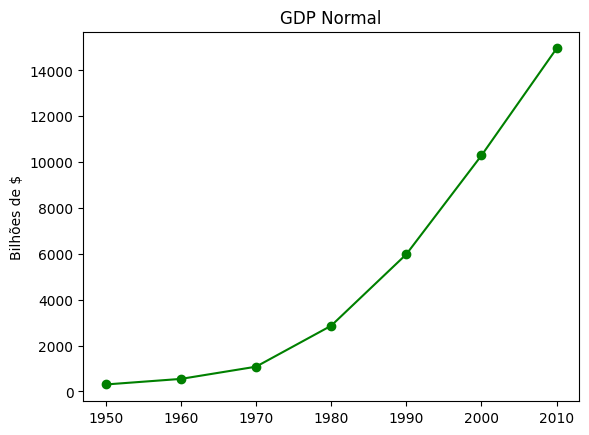

In [60]:
## Exemplo para fazer um gráfico simples 

from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# cria um gráfico de linham ano no eixo x, gdp no eixo y
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

#adiciona um título
plt.title("GDP Normal")

# adiciona um selo no eixto y
plt.ylabel("Bilhões de $")
plt.show

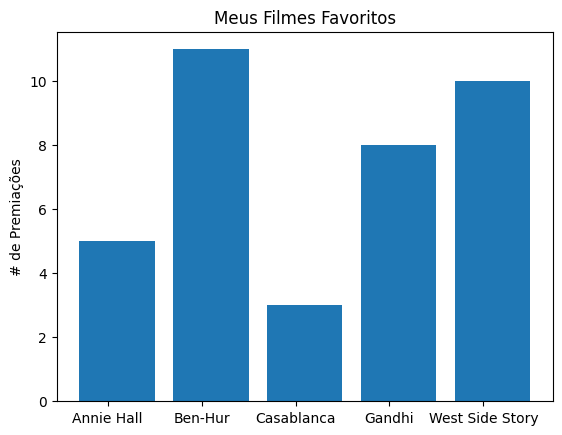

In [61]:
# Gráfico de barra

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# barras possuem o tamanho padrão de 0.0 então adicionaremos 0.1 às coordenadasà esquerda para que cada barra seja centralizada
xs = [i + 0.1 for i, _ in enumerate(movies)]

# as barras do gráfico com as coordenadas x à esquerda [xs], altura [num_oscars]
plt.bar(xs, num_oscars)

plt.ylabel("# de Premiações")
plt.title("Meus Filmes Favoritos")

# nomeia o eixo x com nomes de filmes na barra central
plt.xticks(range(len(movies)), movies)
plt.show()

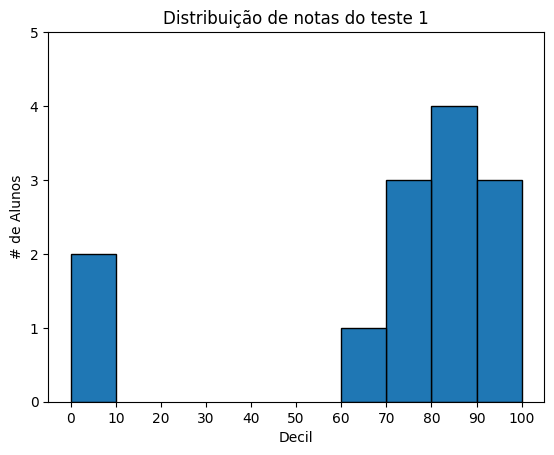

In [63]:
# histograma
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # move cada barra para a esquerda em 5
        histogram.values(),                 # da para cada barra sua altura correta
        10,                                 # da para cada barra a largura de 10
        edgecolor=(0,0,0))                  # define a cor preta para cada borda das barras

plt.axis([-5, 105, 0, 5])                   # eixo x de -5 até 105, eixo y de 0 até 5

plt.xticks([10 * i for i in range(11)])     # rótulo do eixo x de 10 em 10

plt.xlabel("Decil")
plt.ylabel("# de Alunos")
plt.title("Distribuição de notas do teste 1")
plt.show()